<a href="https://colab.research.google.com/github/Prartz/CODSOFT/blob/main/_task2_IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [24]:
df = pd.read_csv('IRIS.csv')


In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<Axes: ylabel='sepal_length'>

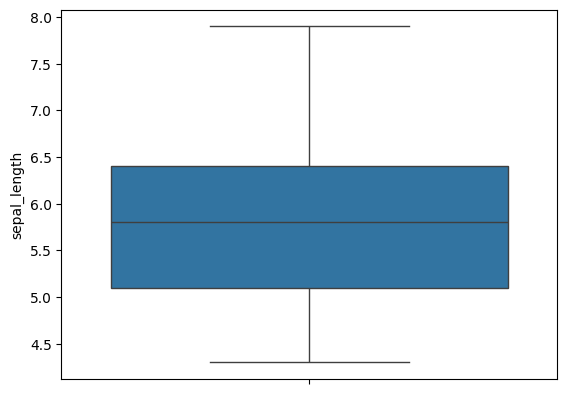

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df['sepal_length'])

<Axes: ylabel='sepal_width'>

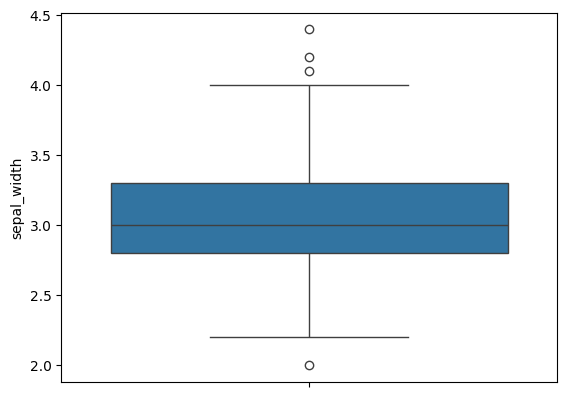

In [30]:
sns.boxplot(df['sepal_width'])

<Axes: ylabel='petal_length'>

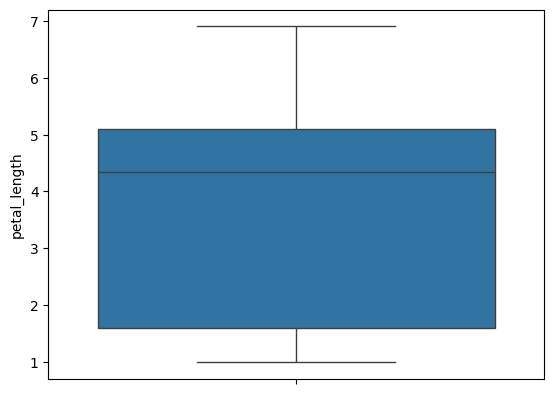

In [31]:
sns.boxplot(df['petal_length'])

In [32]:
def Outlier_Treatment(df1, variable):
    percentile25 = df1[variable].quantile(0.25)
    percentile75 = df1[variable].quantile(0.75)
    iqr=percentile75 - percentile25
    print(percentile25)
    print(percentile75)
    print(iqr)
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df1[df1[variable] > upper_limit]
    df1[df1[variable] < lower_limit]
    df1 = df1[(df1[variable] >= lower_limit) & (df1[variable] <= upper_limit)]
    plt.figure(figsize=(12,6))
    sns.boxplot(df1[variable])
    plt.show()
    global df
    df = df1

2.8
3.3
0.5


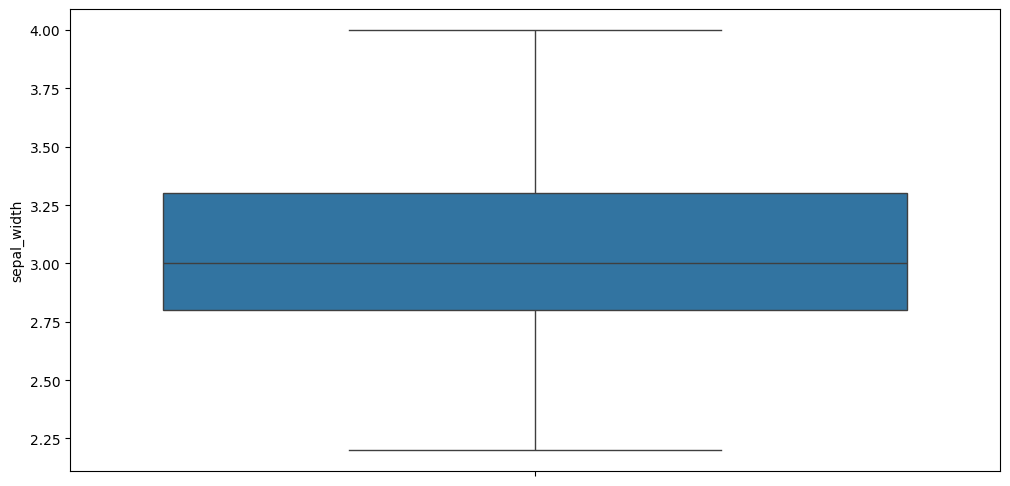

In [33]:
Outlier_Treatment(df, 'sepal_width')

<Axes: xlabel='petal_length', ylabel='petal_width'>

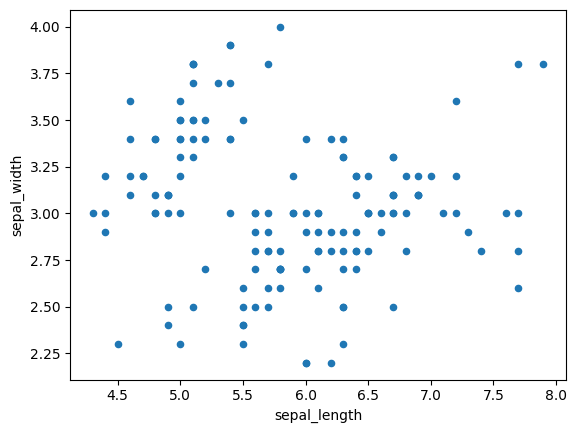

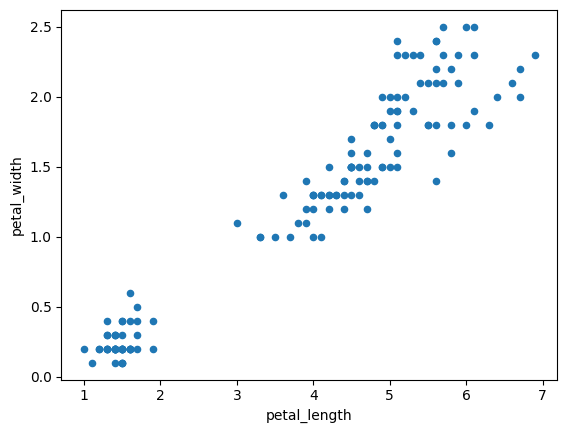

In [34]:
df.plot(kind='scatter',x="sepal_length", y="sepal_width")
df.plot(kind='scatter',x="petal_length", y="petal_width")

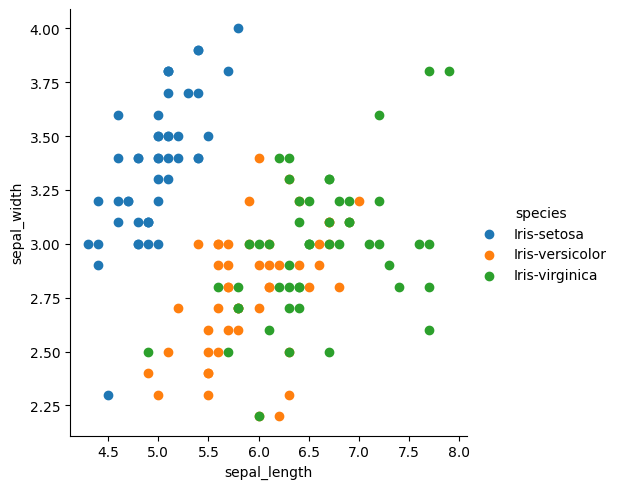

In [35]:
sns.FacetGrid(df, height=5,hue="species").map(plt.scatter,"sepal_length","sepal_width").add_legend()

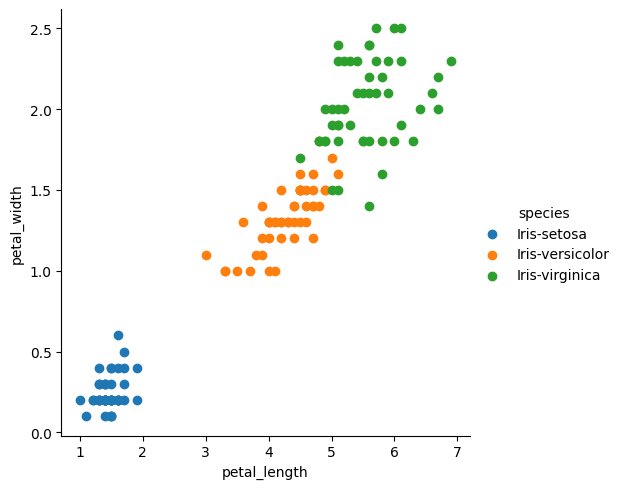

In [36]:

sns.FacetGrid(df, height=5,hue="species").map(plt.scatter,"petal_length","petal_width").add_legend()

<Axes: xlabel='species', ylabel='petal_length'>

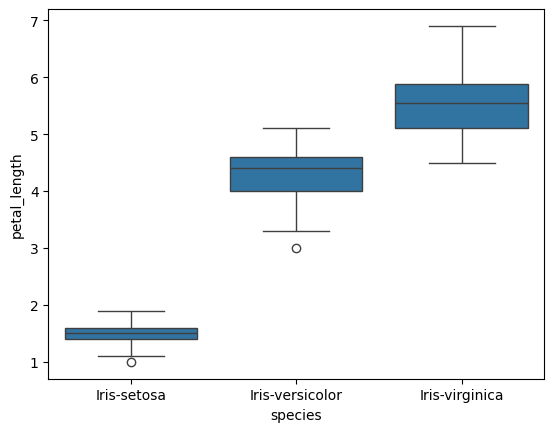

In [37]:
sns.boxplot(x="species", y="petal_length", data=df)

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [39]:
train, test = train_test_split(df, test_size = 0.25,random_state=100)
print(train.shape)
print(test.shape)

(109, 5)
(37, 5)


In [40]:
train_X=train[['sepal_length','sepal_width','petal_length','petal_width']]
train_y=train.species
test_X=test[['sepal_length','sepal_width','petal_length','petal_width']]
test_y=test.species

In [41]:
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
9,4.9,3.1,1.5,0.1
24,4.8,3.4,1.9,0.2
38,4.4,3.0,1.3,0.2
132,6.4,2.8,5.6,2.2


In [42]:
KNN=KNeighborsClassifier(n_neighbors=3)

In [43]:
KNN.fit(train_X,train_y)

KNeighborsClassifier(n_neighbors=3)

In [44]:
prediction=KNN.predict(test_X)

In [45]:
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y)*100,
      'percent')

The accuracy of the KNN is 97.2972972972973 percent


In [46]:
test_y

79     Iris-versicolor
29         Iris-setosa
44         Iris-setosa
49         Iris-setosa
43         Iris-setosa
135     Iris-virginica
54     Iris-versicolor
125     Iris-virginica
11         Iris-setosa
117     Iris-virginica
35         Iris-setosa
27         Iris-setosa
57     Iris-versicolor
16         Iris-setosa
113     Iris-virginica
149     Iris-virginica
81     Iris-versicolor
30         Iris-setosa
40         Iris-setosa
115     Iris-virginica
93     Iris-versicolor
92     Iris-versicolor
17         Iris-setosa
139     Iris-virginica
101     Iris-virginica
66     Iris-versicolor
128     Iris-virginica
77     Iris-versicolor
144     Iris-virginica
96     Iris-versicolor
136     Iris-virginica
103     Iris-virginica
146     Iris-virginica
94     Iris-versicolor
86     Iris-versicolor
6          Iris-setosa
26         Iris-setosa
Name: species, dtype: object

In [47]:
prediction

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [48]:
from sklearn.metrics import confusion_matrix
prediction=KNN.predict(test_X)
confusion_matrix(test_y,prediction)

array([[13,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 13]])

In [49]:
newval=pd.DataFrame({'sepal_length':[5],'sepal_width':[3.5],'petal_length':[1.4],'petal_width':[0.2]})
KNN.predict(newval)

array(['Iris-setosa'], dtype=object)

In [50]:
newval=pd.DataFrame({'sepal_length':[6],'sepal_width':[3],'petal_length':[5],'petal_width':[2]})
KNN.predict(newval)

array(['Iris-virginica'], dtype=object)